The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.0

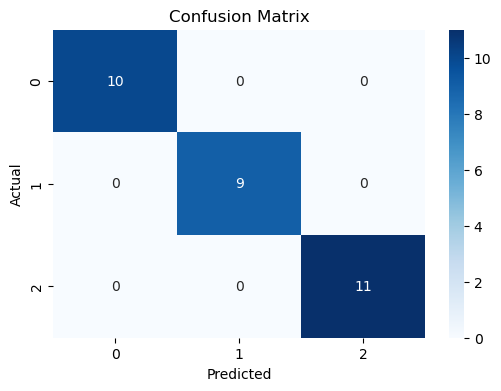

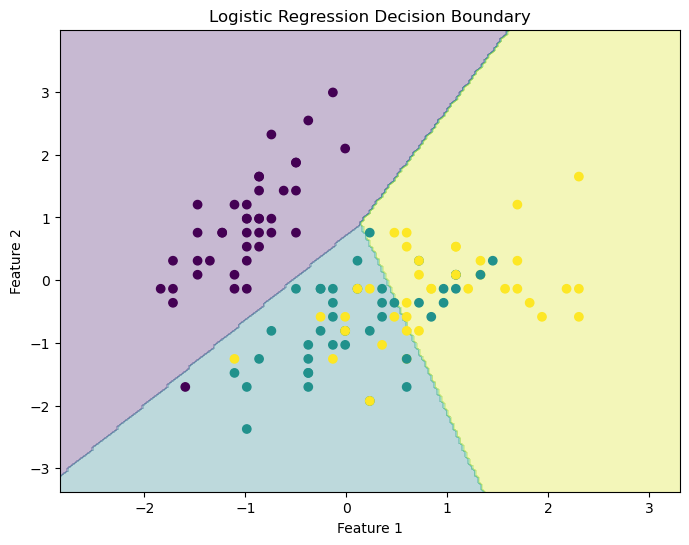


The Logistic Regression model achieved an accuracy of 1.00.
This indicates how well the model classifies the given test samples.



In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Loading the dataset
iris = load_iris()

X = iris.data
y = iris.target


# Converting to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

print(df.head())


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


# Visualizing Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Plotting decision boundary (for first two features only)
X2 = X[:, :2]
y2 = y

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

model2 = LogisticRegression()
model2.fit(X2_train, y2_train)

x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()


# Printing final accuracy message
print("""
The Logistic Regression model achieved an accuracy of {:.2f}.
This indicates how well the model classifies the given test samples.
""".format(acc))
